In [ ]:
# Jupyter Notebook: The Mathematics of Questions

import cmath
import numpy as np
import matplotlib.pyplot as plt

## Analytic Forms of the Tilde Relation

In [445]:
# The solution to x(a-x)(b-x)(1-a-b+x) = a^2 b^2 (1-a)^2 (1-b)^2 given by Wolfram Alpha as specified in Section 2 is:

def wolfram_alpha_solution(a, b):
    i = 1j  # imaginary unit
    
    term1_num = -(1 + i * cmath.sqrt(3)) * (
        -20*a**3*b**3 + 30*a**3*b**2 - 6*a**3*b - 2*a**3 + 
        30*a**2*b**3 - 45*a**2*b**2 + 9*a**2*b + 3*a**2 +
        cmath.sqrt(
            4 * (2*a**2*b**2 - 2*a**2*b - a**2 - 2*a*b**2 + 2*a*b + a - b**2 + b - 1)**3 +
            (-20*a**3*b**3 + 30*a**3*b**2 - 6*a**3*b - 2*a**3 + 
             30*a**2*b**3 - 45*a**2*b**2 + 9*a**2*b + 3*a**2 - 
             6*a*b**3 + 9*a*b**2 - 9*a*b + 3*a - 2*b**3 + 3*b**2 + 3*b - 2)**2
        ) - 
        6*a*b**3 + 9*a*b**2 - 9*a*b + 3*a - 2*b**3 + 3*b**2 + 3*b - 2
    )**(1/3)
    
    term1_den = 6 * 2**(1/3)
    term1 = term1_num / term1_den

    term2_num = (1 - i * cmath.sqrt(3)) * (
        2*a**2*b**2 - 2*a**2*b - a**2 - 2*a*b**2 + 2*a*b + a - b**2 + b - 1
    )
    
    term2_den = 3 * 2**(2/3) * (
        -20*a**3*b**3 + 30*a**3*b**2 - 6*a**3*b - 2*a**3 + 
        30*a**2*b**3 - 45*a**2*b**2 + 9*a**2*b + 3*a**2 +
        cmath.sqrt(
            4 * (2*a**2*b**2 - 2*a**2*b - a**2 - 2*a*b**2 + 2*a*b + a - b**2 + b - 1)**3 +
            (-20*a**3*b**3 + 30*a**3*b**2 - 6*a**3*b - 2*a**3 + 
             30*a**2*b**3 - 45*a**2*b**2 + 9*a**2*b + 3*a**2 - 
             6*a*b**3 + 9*a*b**2 - 9*a*b + 3*a - 2*b**3 + 3*b**2 + 3*b - 2)**2
        ) - 
        6*a*b**3 + 9*a*b**2 - 9*a*b + 3*a - 2*b**3 + 3*b**2 + 3*b - 2
    )**(1/3)
    term2 = term2_num / term2_den

    term3 = (1/3) * (a * (-b) + 2*a + 2*b - 1)

    # Combine all terms
    x = term1 + term2 + term3
    
    return x
    

# Check that the solution satisfies the given condition:

def satisfies_condition(x, a, b):
    return abs(x*(a-x)*(b-x)*(1-a-b+x) - a**2 * b**2 * (1-a)**2 * (1-b)**2) < 1e-15

failed = False
for a in np.linspace(0, 1, 100):
    for b in np.linspace(0, 1, 100):
        if not satisfies_condition(wolfram_alpha_solution(a, b), a, b):
            print(f"Failed at a={a}, b={b}, x={wolfram_alpha_solution(a, b)}")
            failed = True
            break

if not failed:
    print("The Wolfram Alpha solution satisfies the condition x*(a-x)*(b-x)*(1-a-b+x) - a**2 * b**2 * (1-a)**2 * (1-b)**2 = 0.")

The Wolfram Alpha solution satisfies the condition x*(a-x)*(b-x)*(1-a-b+x) - a**2 * b**2 * (1-a)**2 * (1-b)**2 = 0.


In [446]:
# Check the assertion made in the paper that the solution yields 0.12299828119582 for a=b=0.25
print(f"\nAt a=b=0.25, the value of x given by this solution is {wolfram_alpha_solution(0.25, 0.25)}.")


At a=b=0.25, the value of x given by this solution is (0.12299828119582086+2.7755575615628914e-17j).


In [447]:
# Check that the intermediate form of the solution given in section 2 is correct.

def intermediate_solution(a, b):
    term1 = -20 * a**3 * b**3 + 30 * a**3 * b**2 - 6 * a**3 * b - 2 * a**3 + 30 * a**2 * b**3 - 45 * a**2 * b**2 \
            + 9 * a**2 * b + 3 * a**2 -6 * a * b**3 + 9 * a * b**2 - 9 * a * b + 3 * a - 2 * b**3 + 3 * b**2 + 3 * b - 2
    term2 = 2 * a**2 * b**2 - 2 * a**2 * b - a**2 - 2 * a * b**2 + 2 * a * b + a - b**2 + b - 1
    
    sqrt_term = cmath.sqrt(4 * term2**3 + (term1)**2)
    cubic_root_term = cmath.exp(cmath.log(term1 + sqrt_term) / 3)
    
    coeff1 = 1 + cmath.sqrt(3) * 1j
    coeff2 = 1 - cmath.sqrt(3) * 1j
    
    result = - (coeff1 * cubic_root_term) / (6 * cmath.exp(cmath.log(2) / 3)) \
             + (coeff2 * term2) / (3 * cmath.exp(cmath.log(2) * 2 / 3) * cubic_root_term) + (1/3) * (a * -b + 2 * a + 2 * b - 1)
    
    return result


correct = True
for a in np.linspace(0.0001, 0.9999, 100):
    for b in np.linspace(0.0001, 0.9999, 100):
        if abs(intermediate_solution(a, b) - wolfram_alpha_solution(a,b)) > 1e-8:
            print(f"Incorrect solution, a={a}, b={b}, tilde_relation={tilde_relation(a,b)}, wolfram={wolfram_alpha_solution(a,b)}")
            correct = False
            break
if correct:
    print("The intermediate form of the expression for ~ is correct.")

The intermediate form of the expression for ~ is correct.


In [448]:
# Check that the simplified form of the solution given in section 7 is correct.

# Tilde_relation function
def tilde_relation(P_A, P_B):
    """Simplified tilde relation from Section 7."""
    gap_A = 2 * P_A - 1
    gap_B = 2 * P_B - 1
    T = (1/8) * (3 - gap_A**2) * (3 - gap_B**2) - 3/2
    S = -(5/32) * ((9/5 - gap_A**2) * (9/5 - gap_B**2) - (9/5)**2 + 9)
    Y = gap_A * gap_B * S
    U = 1j * np.sqrt(np.abs(T**3 + Y**2))
    w2 = (-1 - 1j * np.sqrt(3)) / 2
    V = 2 * w2 * (Y + U)**(1/3)
    x_minus_ab = (np.real(V) - gap_A * gap_B) / 3
    return P_A * P_B + x_minus_ab

correct = True
for a in np.linspace(0.0001, 0.9999, 100):
    for b in np.linspace(0.0001, 0.9999, 100):
        if abs(tilde_relation(a, b) - wolfram_alpha_solution(a,b)) > 1e-8:
            print(f"Incorrect solution, a={a}, b={b}, tilde_relation={tilde_relation(a,b)}, wolfram={wolfram_alpha_solution(a,b)}")
            correct = False
            break
if correct:
    print("The simplified form of the expression for ~ is correct.")

The simplified form of the expression for ~ is correct.


## Surface Plots

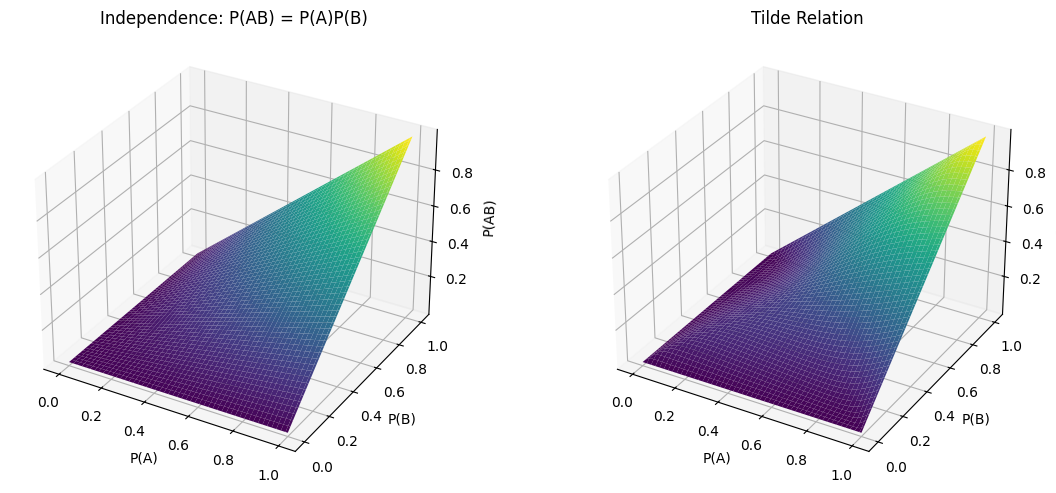

In [449]:
# We plot the surface in 3-d probability space defined by ~, with P(A), P(B), and P(AB) axes, along with the corresponding surface for independence.

P_A_vals = np.linspace(0.0001, 0.9999, 100)
P_B_vals = np.linspace(0.0001, 0.9999, 100)
P_A_grid, P_B_grid = np.meshgrid(P_A_vals, P_B_vals)
P_AB_ind = P_A_grid * P_B_grid  # Independence
P_AB_tilde = tilde_relation(P_A_grid, P_B_grid)

# --- Figure 2.2: Surface Plots ---
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(P_A_grid, P_B_grid, P_AB_ind, cmap='viridis')
ax1.set_title("Independence: P(AB) = P(A)P(B)")
ax1.set_xlabel("P(A)")
ax1.set_ylabel("P(B)")
ax1.set_zlabel("P(AB)")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(P_A_grid, P_B_grid, P_AB_tilde, cmap='viridis')
ax2.set_title("Tilde Relation")
ax2.set_xlabel("P(A)")
ax2.set_ylabel("P(B)")
ax2.set_zlabel("P(AB)")
plt.tight_layout()

plt.show()

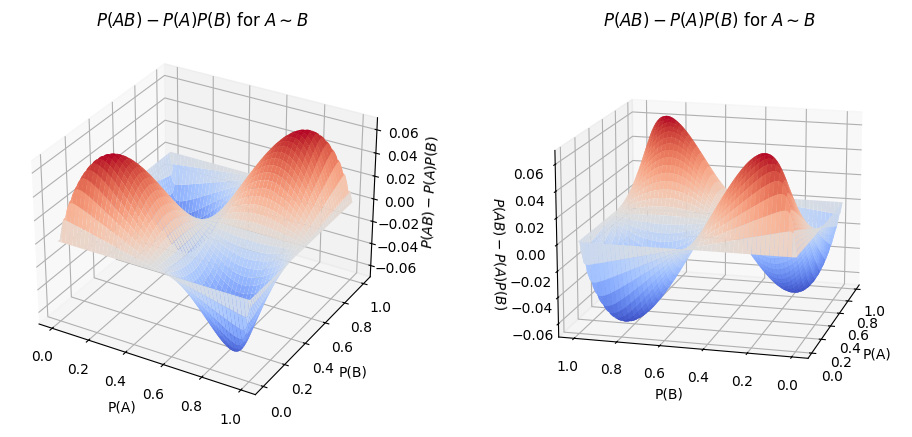

In [450]:
# --- Figure 2.3: Discrepancy Plot ---
discrepancy = P_AB_tilde - P_AB_ind
# Plot as a 3D surface:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(P_A_grid, P_B_grid, discrepancy, cmap='coolwarm')
ax1.set_title(r"$P(AB)-P(A)P(B)$ for $A \sim B$")
ax1.set_xlabel("P(A)")
ax1.set_ylabel("P(B)")
ax1.set_zlabel(r"$P(AB)-P(A)P(B)$")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(P_A_grid, P_B_grid, discrepancy, cmap='coolwarm')
ax2.set_title(r"$P(AB)-P(A)P(B)$ for $A \sim B$")
ax2.set_xlabel("P(A)")
ax2.set_ylabel("P(B)")
ax2.set_zlabel(r"$P(AB)-P(A)P(B)$")

# Set the viewing angle
ax2.view_init(elev=15, azim=195)  

plt.show()

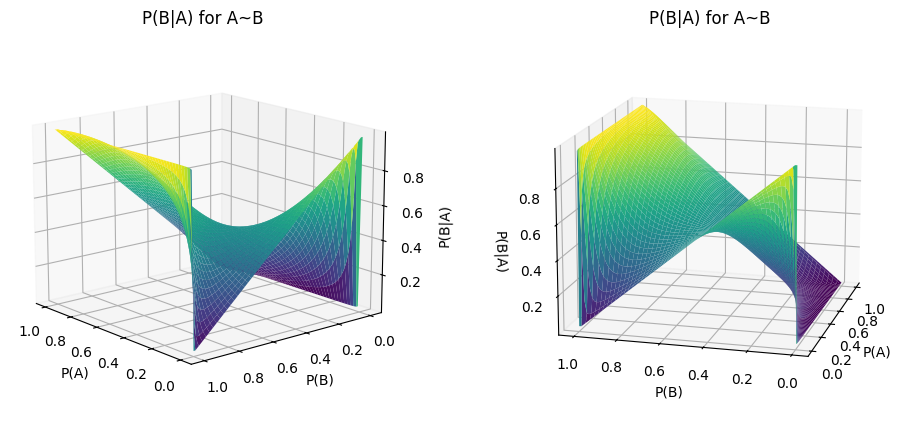

In [451]:
# --- Figure 2.4: B Given A Plot ---
b_given_a = P_AB_tilde / P_A_grid
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(P_A_grid, P_B_grid, b_given_a, cmap='viridis')
ax1.set_title("P(B|A) for A~B")
ax1.set_xlabel("P(A)")
ax1.set_ylabel("P(B)")
ax1.set_zlabel("P(B|A)")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(P_A_grid, P_B_grid, b_given_a, cmap='viridis')
ax2.set_title("P(B|A) for A~B")
ax2.set_xlabel("P(A)")
ax2.set_ylabel("P(B)")
ax2.set_zlabel("P(B|A)")

# Set the viewing angle
ax1.view_init(elev=15, azim=140) 
ax2.view_init(elev=15, azim=195) 

plt.show()

## Update Rules for the Tilde Relation

In [460]:
# Check the rules given in the paper for updating P(B) when A is given

# P(B|A) = P(B) when P(A)=1
a = 1
b = 0.25
x = tilde_relation(a, b)
b_given_a = x/a
print(f"a={a}, b={b}, b_given_a={b_given_a}")

# P(B|A) = P(B) when P(A)=1/2
a = 1/2
b = 0.25
x = tilde_relation(a, b)
b_given_a = x/a
print(f"a={a}, b={b}, b_given_a={b_given_a}")

# P(B|A) = P(¬B) when P(A)=0
a = 1e-6
b = 0.25
x = tilde_relation(a, b)
b_given_a = x/a
print(f"a={a}, b={b}, b_given_a={b_given_a}")

a=1, b=0.25, b_given_a=0.24999999999999992
a=0.5, b=0.25, b_given_a=0.24999999999999992
a=1e-06, b=0.25, b_given_a=0.7499994999699275


### Interpreting the results above

1. P(B|A) = P(B) when P(A)=1

This is trivial. When P(A)=1 and P(B)=0.25, P(B|A) is guaranteed to be 0.25.

2. P(B|A) = P(B) when P(A)=1/2

P(A)=0.5 and P(B)=0.25 => P(B|A) 0.25 is not trivial and is true for independence as well as for the ~ relation. 

3. P(B|A) = P(¬B) when P(A)=0

This is a novel condition satisfied by the ~ relation. 

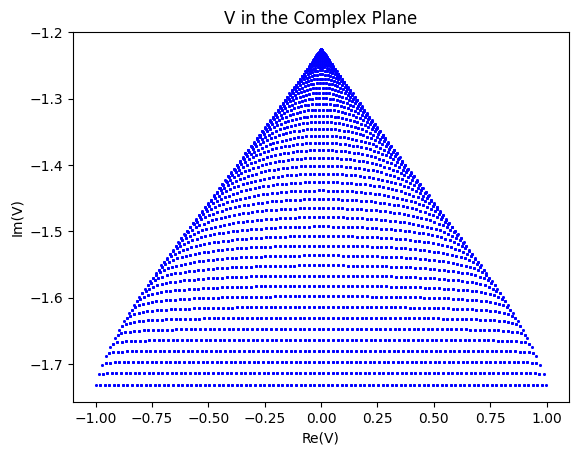

In [461]:
# --- Figure 7.1: Complex Plane Visualization ---
V_vals = []
for P_A in P_A_vals:
    for P_B in P_B_vals:
        gap_A = 2 * P_A - 1
        gap_B = 2 * P_B - 1
        T = (1/8) * (3 - gap_A**2) * (3 - gap_B**2) - 3/2
        S = -(5/32) * ((9/5 - gap_A**2) * (9/5 - gap_B**2) - (9/5)**2 + 9)
        Y = gap_A * gap_B * S
        U = cmath.sqrt(T**3 + Y**2)
        w2 = (-1 - 1j * cmath.sqrt(3)) / 2
        V = 2 * w2 * (Y + U)**(1/3)
        V_vals.append(V)
V_vals = np.array(V_vals).reshape(100, 100)

fig, ax = plt.subplots()
ax.scatter(np.real(V_vals), np.imag(V_vals), c='blue', s=1)
ax.set_title("V in the Complex Plane")
ax.set_xlabel("Re(V)")
ax.set_ylabel("Im(V)")

plt.show()

## Figures 7.3 and 7.4: Transformations of the Tilde Relation (~)

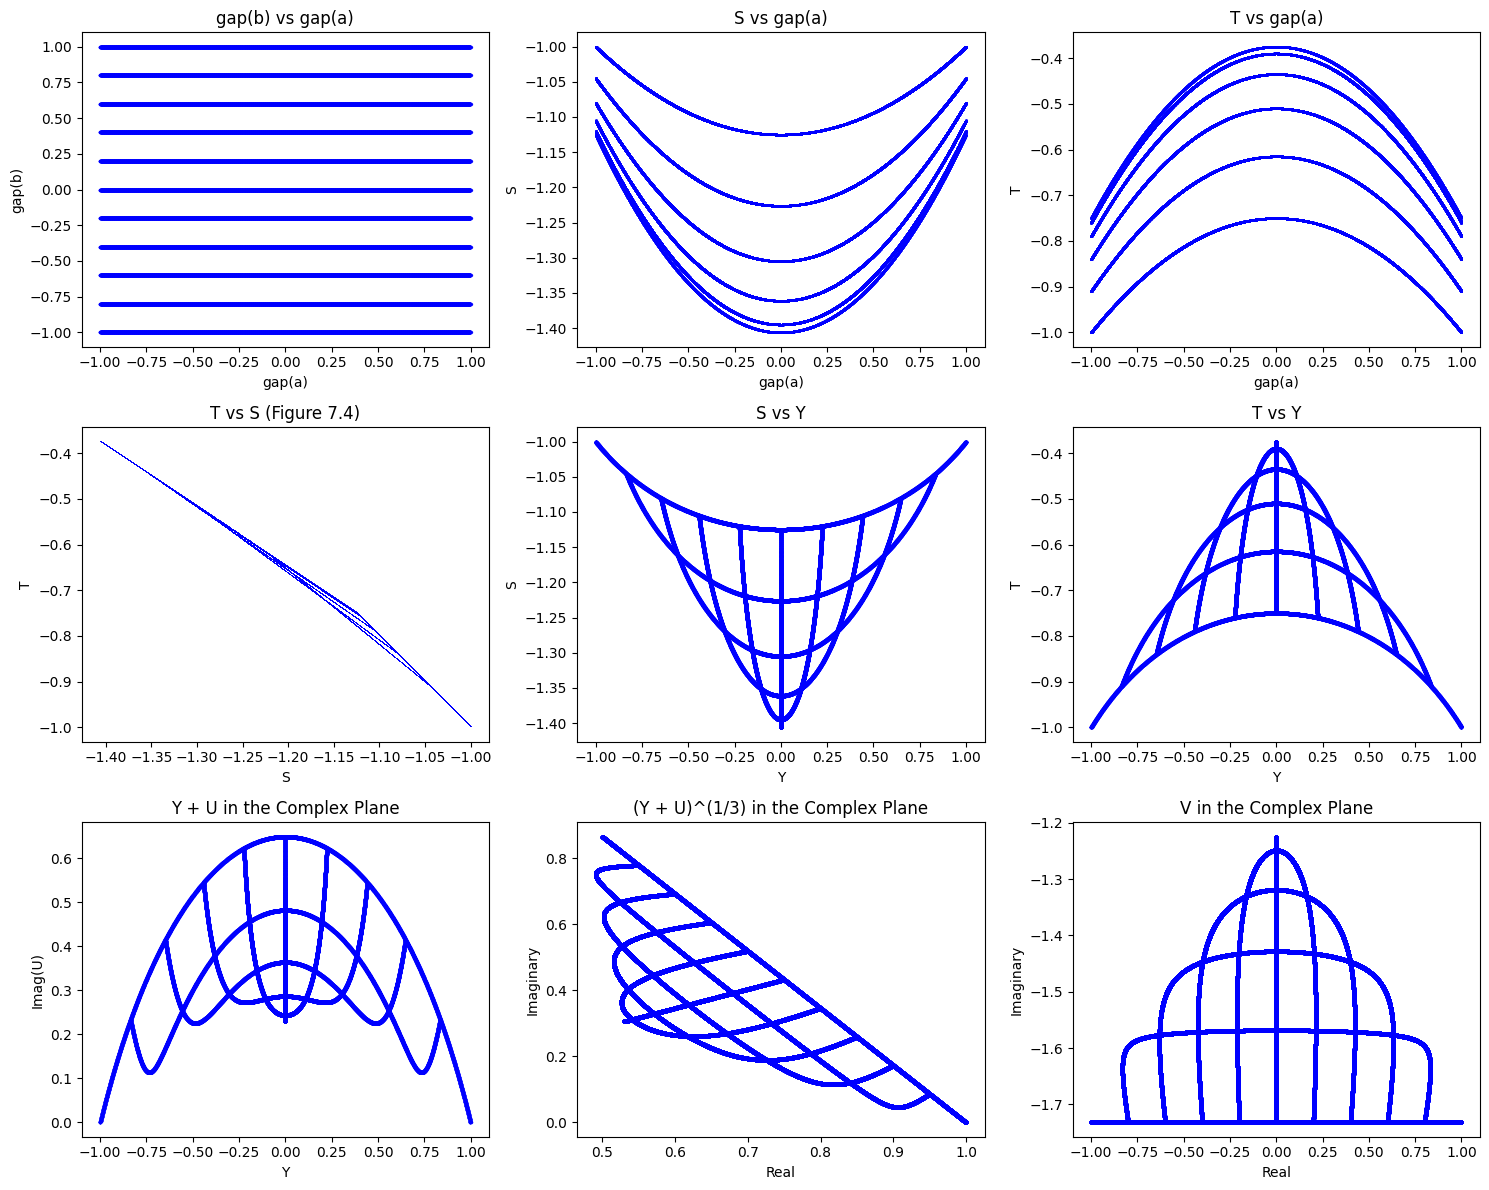

In [462]:
# Define functions from the tilde relation (Section 7)
def gap(a):
    """Compute the signed probability gap for a probability a."""
    return 2 * a - 1

def S(G_A, G_B):
    """Compute S from signed probability gaps."""
    return -(5/32) * ((9/5 - G_A**2) * (9/5 - G_B**2) - (9/5)**2 + 9)

def T_from_gaps(G_A, G_B):
    """Compute T from signed probability gaps."""
    return (1/8) * (3 - G_A**2) * (3 - G_B**2) - 3/2

def Y_from_gaps(G_A, G_B):
    """Compute Y from signed probability gaps and S."""
    return G_A * G_B * S(G_A, G_B)

def T_(a, b):
    """Compute T for probabilities a and b."""
    return T_from_gaps(gap(a), gap(b))

def Y_(a, b):
    """Compute Y for probabilities a and b."""
    return Y_from_gaps(gap(a), gap(b))

def U(a, b):
    """Compute U (imaginary) for probabilities a and b."""
    arg_U = T_(a, b)**3 + Y_(a, b)**2
    return 1j * np.sqrt(np.abs(arg_U))  # U is always imaginary per Section 7

def V(a, b):
    """Compute V (complex) for probabilities a and b."""
    w2 = (-1 - 1j * np.sqrt(3)) / 2
    return 2 * w2 * (Y_(a, b) + U(a, b))**(1/3)

# Generate data
a_vals = np.linspace(0, 1, 5000)  # Increased resolution for smoother plots
b_vals = np.arange(0, 1.1, 0.1)   # Discrete steps for b

# Prepare lists for plotting
gap_a_vals, gap_b_vals = [], []
T_vals, Y_vals, S_vals, U_imag_vals = [], [], [], []
V_points, cbrt_Y_plus_U_points = [], []

# Calculate values for each combination of a and b
for a in a_vals:
    for b in b_vals:
        g_a = gap(a)
        g_b = gap(b)
        
        gap_a_vals.append(g_a)
        gap_b_vals.append(g_b)
        T_vals.append(T_(a, b))
        Y_vals.append(Y_(a, b))
        S_vals.append(S(g_a, g_b))
        U_imag_vals.append(U(a, b).imag)  # Store imaginary part of U
        V_points.append(V(a, b))
        cbrt_Y_plus_U_points.append((Y_(a, b) + U(a, b))**(1/3))

# Plot Figures 7.3 and related transformations (9 subplots)
plt.figure(figsize=(15, 12))

# 1. gap(b) vs gap(a)
plt.subplot(3, 3, 1)
plt.plot(gap_a_vals, gap_b_vals, '.', alpha=0.7, markersize=3, color='blue')
plt.xlabel("gap(a)")
plt.ylabel("gap(b)")
plt.title("gap(b) vs gap(a)")

# 2. S vs gap(a)
plt.subplot(3, 3, 2)
plt.plot(gap_a_vals, S_vals, '.', alpha=0.7, markersize=2, color='blue')
plt.xlabel("gap(a)")
plt.ylabel("S")
plt.title("S vs gap(a)")

# 3. T vs gap(a)
plt.subplot(3, 3, 3)
plt.plot(gap_a_vals, T_vals, '.', alpha=0.7, markersize=2, color='blue')
plt.xlabel("gap(a)")
plt.ylabel("T")
plt.title("T vs gap(a)")

# 4. T vs S (Figure 7.4)
plt.subplot(3, 3, 4)
plt.plot(S_vals, T_vals, ',', alpha=0.7, color='blue')
plt.xlabel("S")
plt.ylabel("T")
plt.title("T vs S (Figure 7.4)")

# 5. S vs Y
plt.subplot(3, 3, 5)
plt.plot(Y_vals, S_vals, '.', alpha=0.7, markersize=3, color='blue')
plt.xlabel("Y")
plt.ylabel("S")
plt.title("S vs Y")

# 6. T vs Y
plt.subplot(3, 3, 6)
plt.plot(Y_vals, T_vals, '.', alpha=0.7, markersize=3, color='blue')
plt.xlabel("Y")
plt.ylabel("T")
plt.title("T vs Y")

# 7. Imag(U) vs Y (Y + U in complex plane, imaginary part)
plt.subplot(3, 3, 7)
plt.plot(Y_vals, U_imag_vals, '.', alpha=0.7, markersize=3, color='blue')
plt.xlabel("Y")
plt.ylabel("Imag(U)")
plt.title("Y + U in the Complex Plane")

# 8. (Y + U)^(1/3) in the complex plane
plt.subplot(3, 3, 8)
plt.scatter([z.real for z in cbrt_Y_plus_U_points], 
            [z.imag for z in cbrt_Y_plus_U_points], 
            alpha=0.7, s=4, color='blue')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("(Y + U)^(1/3) in the Complex Plane")

# 9. V in the complex plane
plt.subplot(3, 3, 9)
plt.scatter([v.real for v in V_points], 
            [v.imag for v in V_points], 
            alpha=0.7, s=4, color='blue')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("V in the Complex Plane")

plt.tight_layout()

plt.show()

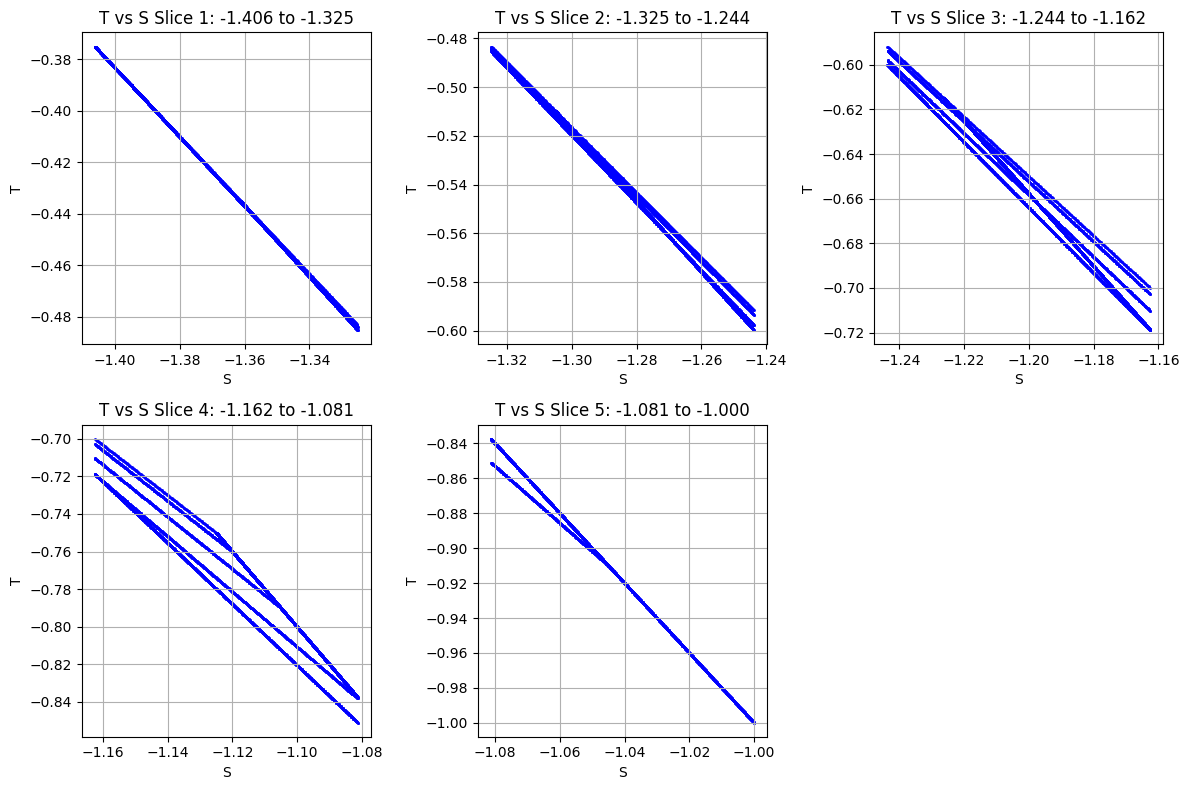

In [463]:
# Plot detailed slices of T vs S (Figure 7.4)
S_min, S_max = min(S_vals), max(S_vals)
T_min, T_max = min(T_vals), max(T_vals)
num_slices = 5
slice_width = (S_max - S_min) / num_slices

plt.figure(figsize=(12, 8))

for i in range(num_slices):
    S_start = S_min + i * slice_width
    S_end = S_start + slice_width
    
    # Filter points within the current slice
    mask = [S_start <= s < S_end for s in S_vals]
    S_slice = np.array(S_vals)[mask]
    T_slice = np.array(T_vals)[mask]
    
    # Plot the slice
    plt.subplot(2, 3, i + 1)
    plt.scatter(S_slice, T_slice, s=1, alpha=0.7, color='blue')
    plt.xlabel("S")
    plt.ylabel("T")
    plt.title(f"T vs S Slice {i+1}: {S_start:.3f} to {S_end:.3f}")
    plt.grid(True)

plt.tight_layout()

plt.show()

## Complex Functions that Relate Complex-Valued Properties of Questions (Section 8)

We check the fractional powers first, and then define a function `check_half_planes` that tests whether a given function \( f(z) \) 
satisfies \( f(-z^*) = -f(z)^* \) in the upper (Im(z) > 0) and lower (Im(z) < 0) half-planes. 
We apply it to a list of functions from Section 8 to verify their behavior.

In [464]:
# Check that the complex functions with fractional powers in section 8 satisfy f(-z*)=-f(z)

import random
import math
import cmath

def f(z, n=4):
    """
    f(z) = i * c * z^(1/n), where c depends on the sign of Im(z).
    
    n must be even to ensure that e^{i pi/n} is a factor of -1 in a consistent way.
    We pick a piecewise c:
      - c = exp(-i pi/(2n)) when Im(z) >= 0
      - c = exp(+i pi/(2n)) when Im(z) < 0
    This ensures f(-z*) = -f(z)* for all z.
    """
    # Choose the phase depending on the half-plane
    if z.imag >= 0:
        c = cmath.exp(-1j * math.pi / (2*n))
    else:
        c = cmath.exp(+1j * math.pi / (2*n))

    # Then f(z) = i * c * z^(1/n).  Use Python's principal branch z**(1.0/n).
    return 1j * c * (z ** (1.0 / n))

def check_identity(n=4, N=10):
    """
    Randomly check the identity f(-z*) = -f(z)* for the function f defined above.
    """
    print(f"Checking the identity f(-z*) = -f(z)* for f(z) = \ne^(-i pi/{2*n}) z^(1/{n}) in the upper half-plane, \ne^(i pi/{2*n}) z^(1/{n}) in the lower half-plane.")
    failed = False
    for _ in range(N):
        # Random complex z in some range
        x = random.uniform(-2, 2)
        y = random.uniform(-2, 2)
        z = complex(x, y)

        lhs = f(-z.conjugate(), n)   # f(-z^*)
        rhs = -f(z, n).conjugate()   # -f(z)^*
        diff = lhs - rhs

        if abs(diff) > 1e-10:
            print(f"z = {z: .3f}")
            print(f"  f(-z*)       = {lhs: .5f}")
            print(f"  -f(z)*       = {rhs: .5f}")
            print(f"  difference   = {diff: .5e} (abs={abs(diff):.5e})\n")
            failed = True
    return not failed

for i in range(2, 7):
    if check_identity(n=i, N=1000):
        print("The identity holds for this function.\n")

Checking the identity f(-z*) = -f(z)* for f(z) = 
e^(-i pi/4) z^(1/2) in the upper half-plane, 
e^(i pi/4) z^(1/2) in the lower half-plane.
The identity holds for this function.

Checking the identity f(-z*) = -f(z)* for f(z) = 
e^(-i pi/6) z^(1/3) in the upper half-plane, 
e^(i pi/6) z^(1/3) in the lower half-plane.
The identity holds for this function.

Checking the identity f(-z*) = -f(z)* for f(z) = 
e^(-i pi/8) z^(1/4) in the upper half-plane, 
e^(i pi/8) z^(1/4) in the lower half-plane.
The identity holds for this function.

Checking the identity f(-z*) = -f(z)* for f(z) = 
e^(-i pi/10) z^(1/5) in the upper half-plane, 
e^(i pi/10) z^(1/5) in the lower half-plane.
The identity holds for this function.

Checking the identity f(-z*) = -f(z)* for f(z) = 
e^(-i pi/12) z^(1/6) in the upper half-plane, 
e^(i pi/12) z^(1/6) in the lower half-plane.
The identity holds for this function.



In [465]:
# --- Section 8: A Function to Check for f(-z*) = -f(z*) in Half-Planes ---

import numpy as np
import matplotlib.pyplot as plt

# Define the constraint checker for half-planes
def check_half_planes(f, tol=1e-8):
    """
    Check if f(-z*) = -f(z*) holds in upper and lower half-planes.
    
    Args:
        f: Function to test (takes complex input, returns complex output).
        tol: Tolerance for numerical equality (default: 1e-8).
    
    Returns:
        [upper_valid, lower_valid]: List of two booleans indicating if constraint holds.
    """
    # Small grid for efficiency, focusing on half-planes
    x = np.linspace(-1, 1, 50)
    y_upper = np.linspace(0.1, 1, 25)  # Upper half-plane
    y_lower = np.linspace(-1, -0.1, 25)  # Lower half-plane
    
    # Upper half-plane test
    X_upper, Y_upper = np.meshgrid(x, y_upper)
    Z_upper = X_upper + 1j * Y_upper
    diff_upper = np.abs(f(-np.conj(Z_upper)) - (-np.conj(f(Z_upper))))
    upper_valid = np.all(diff_upper < tol)
    
    # Lower half-plane test
    X_lower, Y_lower = np.meshgrid(x, y_lower)
    Z_lower = X_lower + 1j * Y_lower
    diff_lower = np.abs(f(-np.conj(Z_lower)) - (-np.conj(f(Z_lower))))
    lower_valid = np.all(diff_lower < tol)
    
    return [upper_valid, lower_valid]

# Define test functions from Section 8
def f_z3(z):
    """f(z) = z^3"""
    return z**3

def f_sin(z):
    """f(z) = sin(z)"""
    return np.sin(z)

def f_w2_cube_root(z):
    """f(z) = w_2 * z^(1/3), w_2 = (-1 - i sqrt(3))/2"""
    w2 = (-1 - 1j * np.sqrt(3)) / 2
    return w2 * z**(1/3)

def f_w1_cube_root(z):
    """f(z) = w_1 * z^(1/3), w_1 = (-1 + i sqrt(3))/2"""
    w1 = (-1 + 1j * np.sqrt(3)) / 2
    return w1 * z**(1/3)

def f_z2(z):
    """f(z) = z^2 (should fail everywhere)"""
    return z**2

def f_exp_iz(z):
    """f(z) = i * e^(i*z)"""
    return 1j * np.exp(1j * z)

# List of functions to test
functions_to_test = [
    ("z^3", f_z3),
    ("sin(z)", f_sin),
    ("w_2 * z^(1/3)", f_w2_cube_root),
    ("w_1 * z^(1/3)", f_w1_cube_root),
    ("z^2", f_z2),
    ("i * e^(i*z)", f_exp_iz)
]

# Test and print results
print("Verification of f(-z*) = -f(z*) for Functions from Section 8:")
print("Function".ljust(20) + "Upper Half-Plane".ljust(20) + "Lower Half-Plane")
print("-" * 60)
for name, func in functions_to_test:
    result = check_half_planes(func)
    upper_str = "True" if result[0] else "False"
    lower_str = "True" if result[1] else "False"
    print(f"{name.ljust(20)}{upper_str.ljust(20)}{lower_str}")


Verification of f(-z*) = -f(z*) for Functions from Section 8:
Function            Upper Half-Plane    Lower Half-Plane
------------------------------------------------------------
z^3                 True                True
sin(z)              True                True
w_2 * z^(1/3)       True                False
w_1 * z^(1/3)       False               True
z^2                 False               False
i * e^(i*z)         True                True


### Interpretation of Results

- **True** in a half-plane means the function satisfies \( f(-z^*) = -f(z)^* \) there (error < 1e-8).
- **\( z^3 \), \( sin(z) \)**: Expected to be True in both half-planes (global validity).
- **\( w_2 z^{1/3} \)**: Should be True only in upper half-plane (Im(z) > 0).
- **\( w_1 z^{1/3} \)**: Should be True only in lower half-plane (Im(z) < 0).
- **\( z^2 \)**: Counterexample, should be False everywhere.
- **\( i e^{i z} \)**: Should be True everywhere.

The output confirms Section 8's claims about which functions satisfy the constraint and where.

## Section 14: Deriving Hilbert Space Addition from the Bloch Sphere

This section implements and verifies the relationship between geometric operations on the Bloch sphere 
and Hilbert space addition for two-state quantum systems (qubits), as described in Section 14, 
Subsection "Addition in the Hilbert Space" and Figures 14.1–14.2. The paper states that Hilbert 
space addition |psi_1> + |psi_2> corresponds to the "addition with an angle" 
operation on the Bloch sphere, where the angle phi = arg(<psi_1|psi_2>).

We’ll define functions to:
- Represent qubit states on the Bloch sphere using angles, theta and phi.
- Compute inner products and Bloch sphere angles.
- Verify that the midpoint state |psi_{mid}> = |psi_1> + e^{-i phi} |psi_2>
  (normalized) lies equidistant from |psi_1> and |psi_2> on the sphere.

In [469]:
def state_on_bloch_sphere(theta, phi):
    """
    Returns the 2D complex state vector corresponding to the Bloch-sphere angles:
        |psi> = cos(theta/2)|0> + e^{i phi} sin(theta/2)|1>
    
    Args:
        theta (float): Polar angle (0 to pi) in radians.
        phi (float): Azimuthal angle (0 to 2pi) in radians.
    
    Returns:
        np.ndarray: Complex 2D state vector.
    """
    return np.array([
        np.cos(theta/2),
        np.exp(1j*phi) * np.sin(theta/2)
    ], dtype=complex)

def inner_product(psi1, psi2):
    """
    Computes the inner product <psi1|psi2>.
    Uses np.vdot(u, v) = conj(u)^T * v in NumPy, matching Dirac bracket notation.
    
    Args:
        psi1, psi2 (np.ndarray): 2D complex state vectors.
    
    Returns:
        complex: Inner product <psi1|psi2>.
    """
    return np.vdot(psi1, psi2)

def bloch_angle(psi1, psi2):
    """
    Returns the angular distance on the Bloch sphere between two normalized states.
    For qubits, the overlap is <psi1|psi2>, and the angle is:
         alpha = 2 * arccos(|<psi1|psi2>|).
    
    Args:
        psi1, psi2 (np.ndarray): Normalized 2D complex state vectors.
    
    Returns:
        float: Angular distance in radians (0 to pi).
    """
    overlap = inner_product(psi1, psi2)
    mag = np.abs(overlap)
    # Clip to avoid numerical issues (e.g., rounding errors > 1)
    mag = min(mag, 1.0)
    alpha = 2.0 * np.arccos(mag)
    return alpha

def normalize(state):
    """
    Normalizes a 2D complex vector to have unit norm.
    
    Args:
        state (np.ndarray): 2D complex state vector.
    
    Returns:
        np.ndarray: Normalized state vector.
    
    Raises:
        ValueError: If the norm is near zero.
    """
    norm = np.linalg.norm(state)
    if norm < 1e-15:
        raise ValueError("Cannot normalize a near-zero vector!")
    return state / norm

# Verification function for Hilbert space addition
def verify_hilbert_addition(iterations=1000):
    """
    Verifies that Hilbert space addition on the Bloch sphere aligns with geometric midpoint 
    properties, using random state pairs. Prints failures for inspection.
    
    Args:
        iterations (int): Number of random state pairs to test.
    """
    for _ in range(iterations):
        # Generate random Bloch sphere angles
        theta1, phi1 = np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi)
        theta2, phi2 = np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi)

        # Get state vectors
        psi1 = state_on_bloch_sphere(theta1, phi1)
        psi2 = state_on_bloch_sphere(theta2, phi2)

        # Compute overlap and phase for midpoint
        overlap = inner_product(psi1, psi2)
        overlap_phase = np.angle(overlap)
        phi = -overlap_phase  # Phase for alignment, per paper

        # Form unnormalized midpoint state
        psi_mid_unnormalized = psi1 + np.exp(1j*phi) * psi2

        # Normalize to get midpoint on Bloch sphere
        psi_mid = normalize(psi_mid_unnormalized)

        # Compute Bloch sphere angles
        angle_12 = bloch_angle(psi1, psi2)  # Angle between psi1 and psi2
        angle_1mid = bloch_angle(psi1, psi_mid)  # Angle between psi1 and midpoint
        angle_mid2 = bloch_angle(psi_mid, psi2)  # Angle between midpoint and psi2

        # Check if midpoint is truly the midpoint of the *shortest* arc
        tolerance = 1e-8
        is_midpoint_of_shortest_arc = (
            np.isclose(angle_1mid, angle_mid2, rtol=tolerance) and
            np.isclose(angle_1mid + angle_mid2, angle_12, rtol=tolerance)
        )
        
        if not is_midpoint_of_shortest_arc:
            print("==================================================")
            print("Verification failed: Midpoint not on the shortest arc")
            print("==================================================")
            print(f"Bloch angles (theta1={theta1:.5f}, phi1={phi1:.5f}), "
                  f"(theta2={theta2:.5f}, phi2={phi2:.5f})\n")
            print(f"<psi1|psi2>          = {overlap:.5f}")
            print(f"arg(<psi1|psi2>)     = {overlap_phase:.5f} radians")
            print(f"Chosen phi           = {phi:.5f} radians\n")
            print(" -- Checking Bloch-sphere angles -- ")
            print(f"Angle between psi1 and psi2     = {angle_12:.5f} radians")
            print(f"Angle between psi1 and psi_mid  = {angle_1mid:.5f} radians")
            print(f"Angle between psi_mid and psi2  = {angle_mid2:.5f} radians\n")
            print("Ideally, angle_1mid = angle_mid2 and "
                  "angle_1mid + angle_mid2 = angle_12.")
            print("==================================================")
            return False
        return True

# Run verification
print("Results:\n")

if verify_hilbert_addition(iterations=1000):
    print(
"""The phase of the quantum amplitude, <psi1|psi2>, encodes the angular discrepancy 
between addition in the Hilbert space and the arc-midpoint operation in all cases tested.""")
else:
    print(
"""The phase of the quantum amplitude, <psi1|psi2>, does not encode the angular discrepancy 
between addition in the Hilbert space and the arc-midpoint operation in the case reported above.""")

Results:

The phase of the quantum amplitude, <psi1|psi2>, encodes the angular discrepancy 
between addition in the Hilbert space and the arc-midpoint operation in all cases tested.
